# Сессия 1. Ультразвуковой контроль

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

## Загрузка данных и очистка от технической информации
В данном датасете имеется первая строчка, которая содержит в себе техническую информацию, которую необходимо убрать

In [2]:
sop1 = pd.read_csv("sop/SOP1.dat", engine="python", sep="\s+", header=None, skiprows=1, index_col=0)
sop2 = pd.read_csv("sop/SOP2.dat", engine="python", sep="\s+", header=None, skiprows=1, index_col=0)
sop3 = pd.read_csv("sop/SOP3.dat", engine="python", sep="\s+", header=None, skiprows=1, index_col=0)


In [3]:
sop1.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
1,0,35,202,27,29,35,0,0,255,147,54,119,125,212,17,39
2,0,23,190,27,22,29,0,0,255,147,56,95,156,223,13,27
3,1,0,188,24,10,13,0,0,255,145,59,40,172,254,10,0
4,5,0,183,26,6,1,0,0,255,153,66,22,172,255,7,0
5,4,0,188,32,4,0,0,0,255,157,62,18,170,255,14,21


In [4]:
sop2.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
1,0,0,175,12,0,0,0,0,255,112,0,0,233,173,2,23
2,0,0,159,10,10,0,0,0,255,108,0,0,222,173,10,34
3,0,0,139,25,48,0,0,0,255,145,0,0,230,175,18,18
4,0,0,130,54,61,0,0,0,255,216,0,1,237,185,52,22
5,0,0,110,54,57,0,0,0,236,207,3,4,239,205,43,20


In [5]:
sop3.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
1,0,0,0,10,148,56,0,3,39,118,0,4,88,154,49,14
2,0,0,0,28,129,55,0,0,48,150,0,0,67,140,54,5
3,0,0,0,48,94,58,13,0,16,210,0,0,47,98,59,62
4,0,0,0,54,68,51,0,0,18,244,2,0,37,73,29,12
5,0,0,0,81,46,36,0,0,16,255,11,0,41,58,15,3


## Предварительное изучение
Ниже представленны распределения переменных (таблица (максимальное, минимальное значение,
среднеквадратичное отклонение, медиана, квартили)

In [6]:
sop1.describe().T["mean"].mean()

38.55638195777352

In [7]:
sop2.describe().T

,count,mean,std,min,25%,50%,75%,max
1,1039.0,0.623677,4.661350,0.0,0.0,0.0,0.0,47.0
2,1039.0,4.682387,17.853913,0.0,0.0,0.0,0.0,115.0
3,1039.0,11.102984,33.781258,0.0,0.0,0.0,1.0,255.0
4,1039.0,14.403272,47.885602,0.0,0.0,0.0,0.0,255.0
5,1039.0,68.232916,64.115154,0.0,13.0,53.0,104.5,255.0
6,1039.0,72.699711,68.435998,0.0,5.0,59.0,118.0,255.0
7,1039.0,0.738210,7.310799,0.0,0.0,0.0,0.0,152.0
8,1039.0,1.178056,7.571118,0.0,0.0,0.0,0.0,84.0
9,1039.0,41.561116,54.114379,0.0,8.0,24.0,49.0,255.0
10,1039.0,54.715111,70.420808,0.0,9.0,31.0,66.0,255.0


In [8]:
sop3.describe().T

,count,mean,std,min,25%,50%,75%,max
1,1038.0,0.780347,4.388105,0.0,0.00,0.0,0.00,43.0
2,1038.0,19.334297,49.438477,0.0,0.00,0.0,2.75,255.0
3,1038.0,20.899807,54.557177,0.0,0.00,0.0,5.00,255.0
4,1038.0,16.554913,40.423486,0.0,0.00,0.0,8.00,239.0
5,1038.0,150.868015,85.022845,0.0,80.00,157.0,238.00,255.0
6,1038.0,80.681118,61.259486,0.0,29.00,75.0,118.00,255.0
7,1038.0,1.052987,5.751197,0.0,0.00,0.0,0.00,64.0
8,1038.0,1.202312,9.125796,0.0,0.00,0.0,0.00,123.0
9,1038.0,49.246628,69.988640,0.0,3.00,20.0,57.00,255.0
10,1038.0,91.547206,80.183175,0.0,37.00,61.0,115.75,255.0


## Ящик с усами 

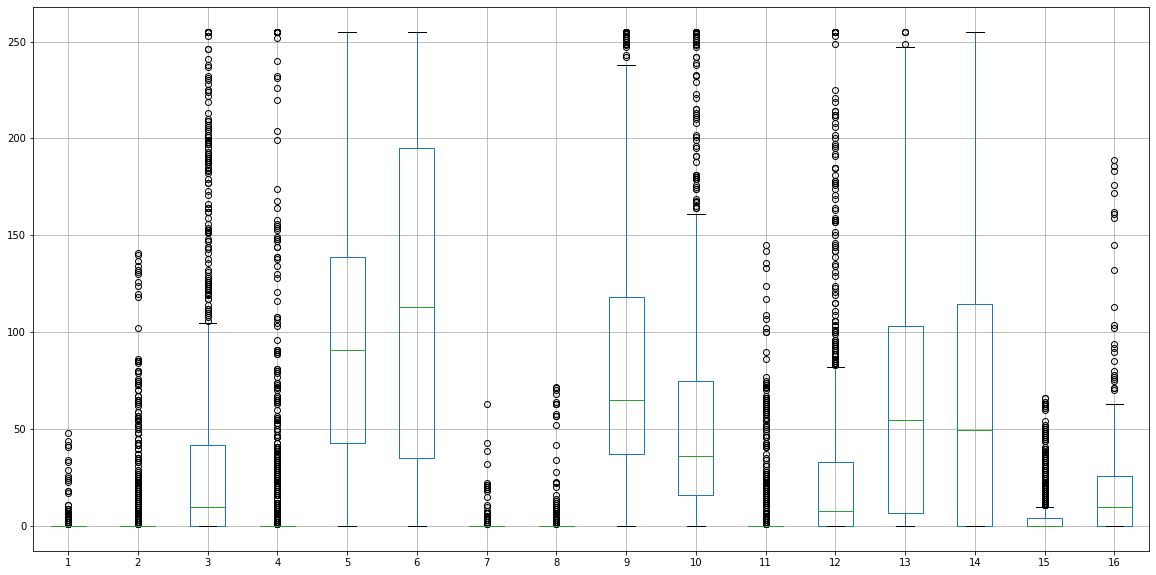

In [9]:
plt.figure(figsize=(20,10))
sop1.boxplot()

Из графика видно что минимальное значение равно 0, максимольное 255. среднее значение вариируется от 0 до 110 много значений которые не попадают в "ящик с усами"

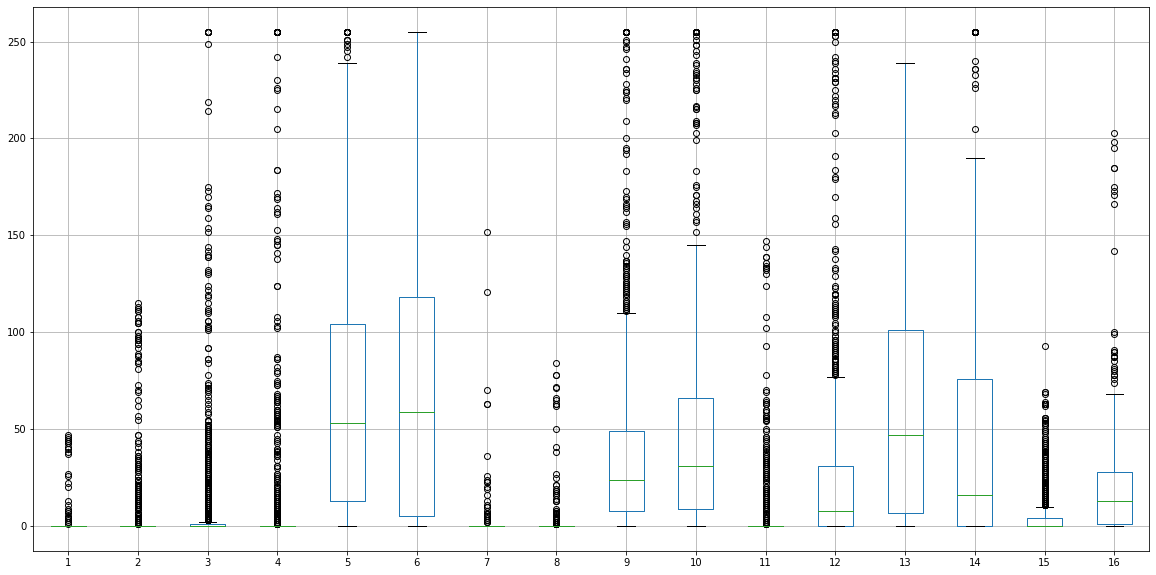

In [10]:
plt.figure(figsize=(20,10))
sop2.boxplot()

Из графика видно что минимальное значение равно 0, максимольное 255. среднее значение вариируется от 0 до 110 много значений которые не попадают в "ящик с усами"

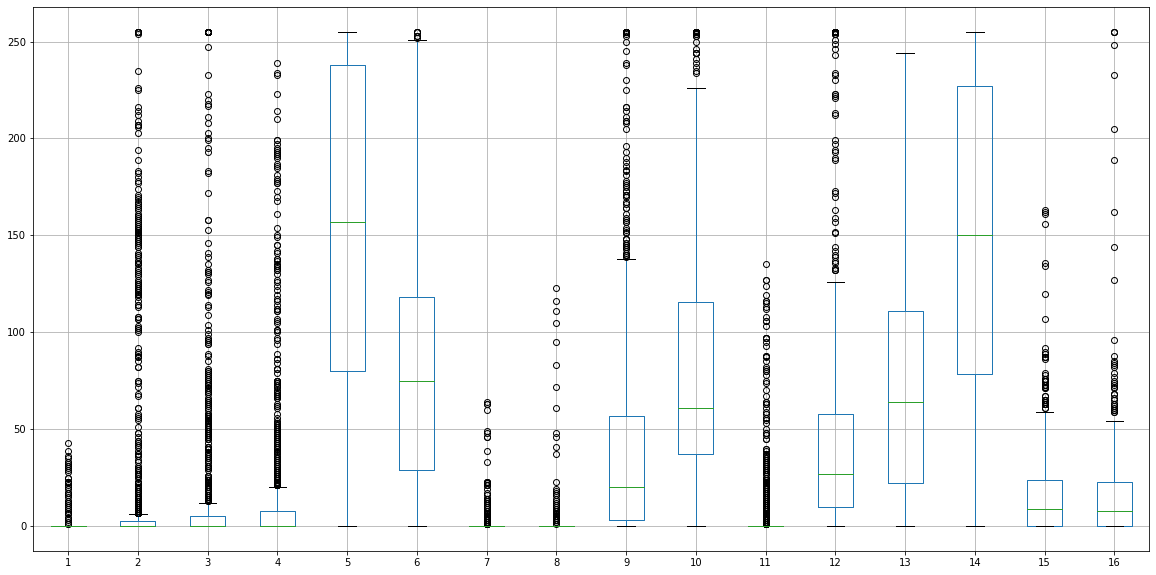

In [11]:
plt.figure(figsize=(20,10))
sop3.boxplot()

Из графика видно что минимальное значение равно 0, максимольное 255. среднее значение вариируется от 0 до 110 много значений которые не попадают в "ящик с усами"

## Значения в координатах

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C660065A48>,
      dtype=object)

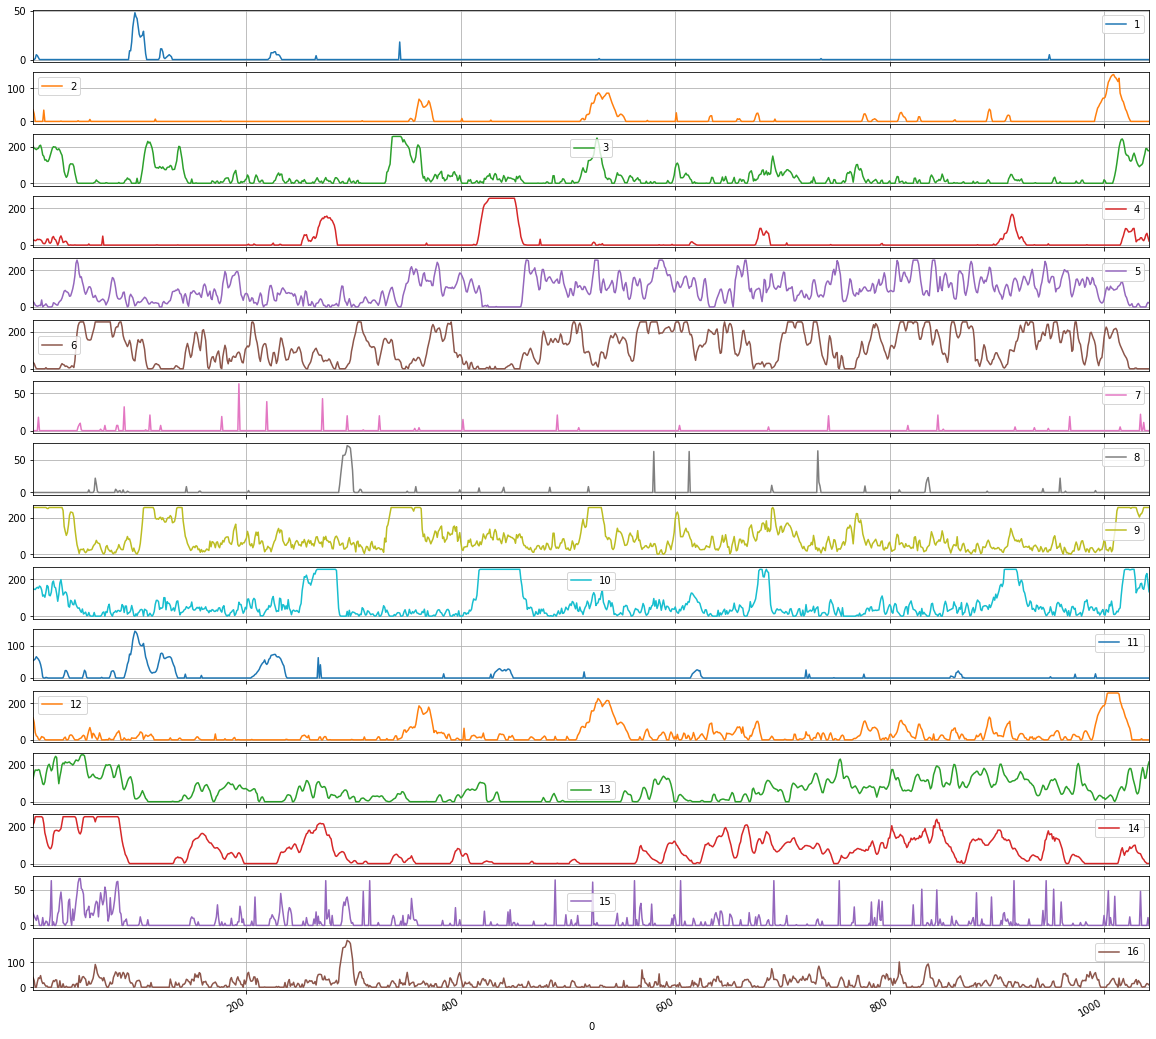

In [12]:
sop1.plot(subplots=True,figsize=(20,20),grid="on")

Из графиков видно что некотрые значения приближенны к нулю, другие стремтяся к 255. Нас, в дальнейшем будут интересовать сильные выбросы или падения на этих графиках

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C661634F88>,
      dtype=object)

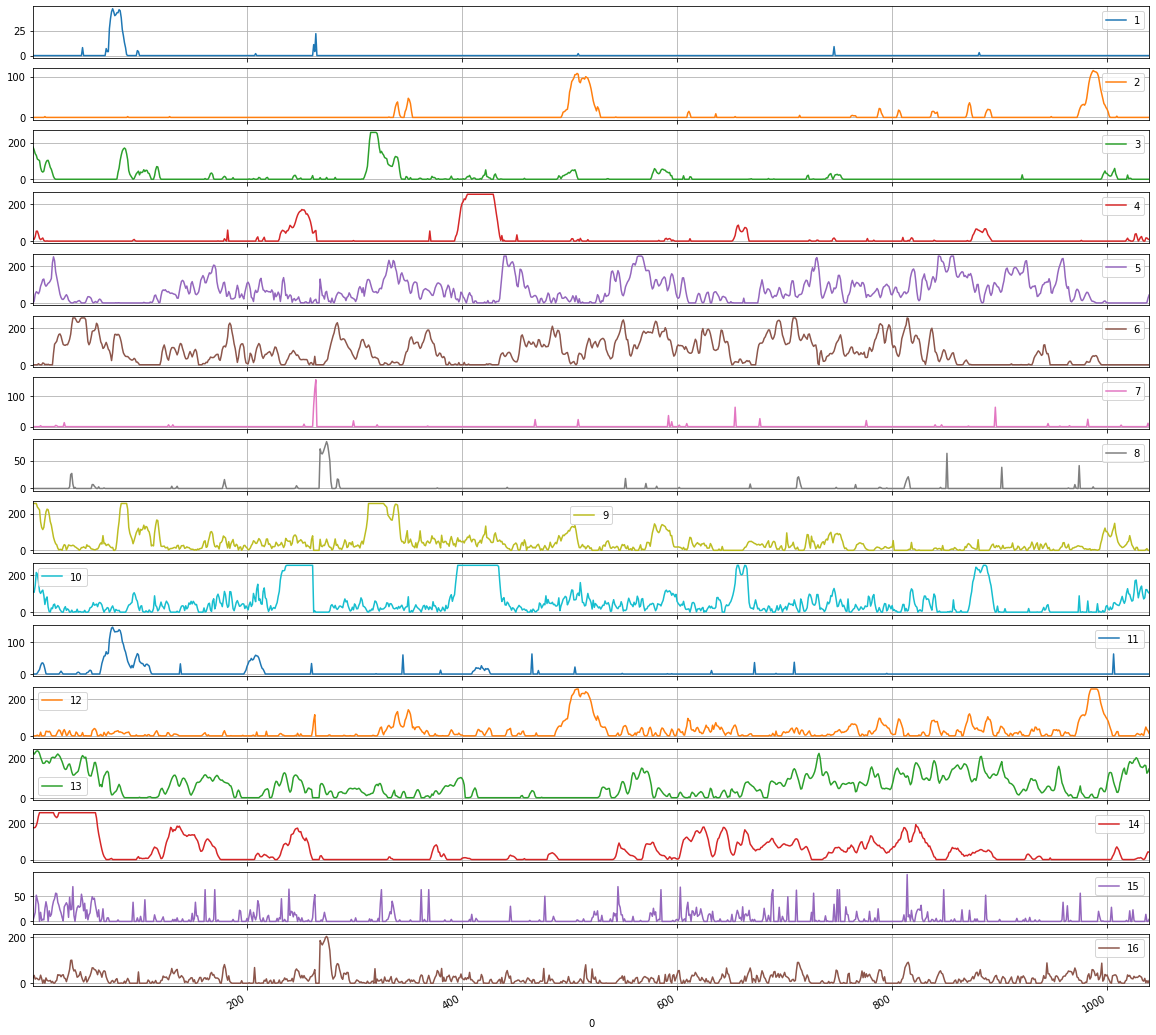

In [13]:
sop2.plot(subplots=True,figsize=(20,20),grid="on")

Из графиков видно что некотрые значения приближенны к нулю, другие стремтяся к 255. Нас, в дальнейшем будут интересовать сильные выбросы или падения на этих графиках

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C662C63608>,
      dtype=object)

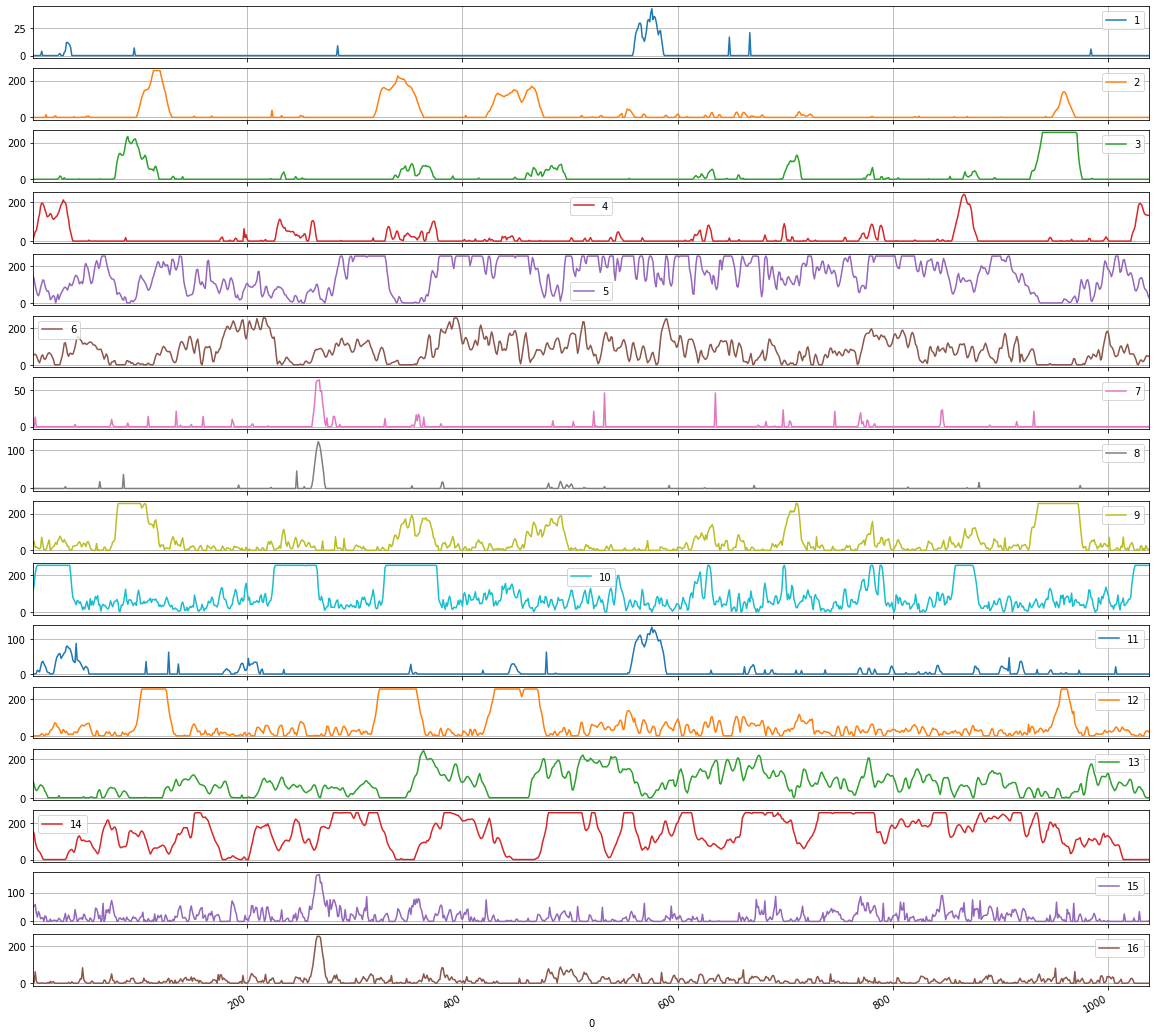

In [14]:
sop3.plot(subplots=True,figsize=(20,20),grid="on")

Из графиков видно что некотрые значения приближенны к нулю, другие стремтяся к 255. Нас, в дальнейшем будут интересовать сильные выбросы или падения на этих графиках

## Графики статистических распределений

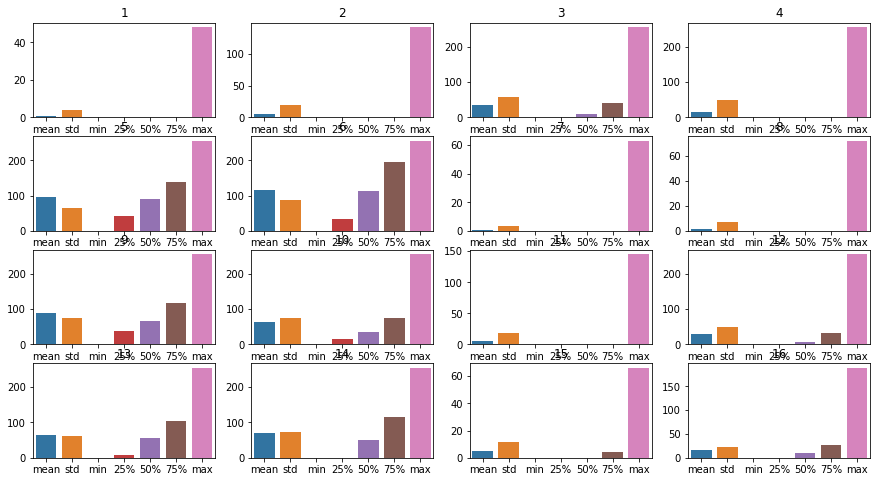

In [15]:
fig, axes = plt.subplots(ncols=4,nrows=4, figsize=(15,8))
a=[]
for i in axes:
    for j in i:
        a.append(j)
for i, ax in zip(sop1.columns, a):
    sns.barplot(x=sop1.describe()[i].keys()[1:], y=sop1.describe()[i].values[1:],ax=ax).set_title(str(i))

Из этих графиков видно как идет распределения в каждой колонке: из среднее, стандартное отклонение и квартили

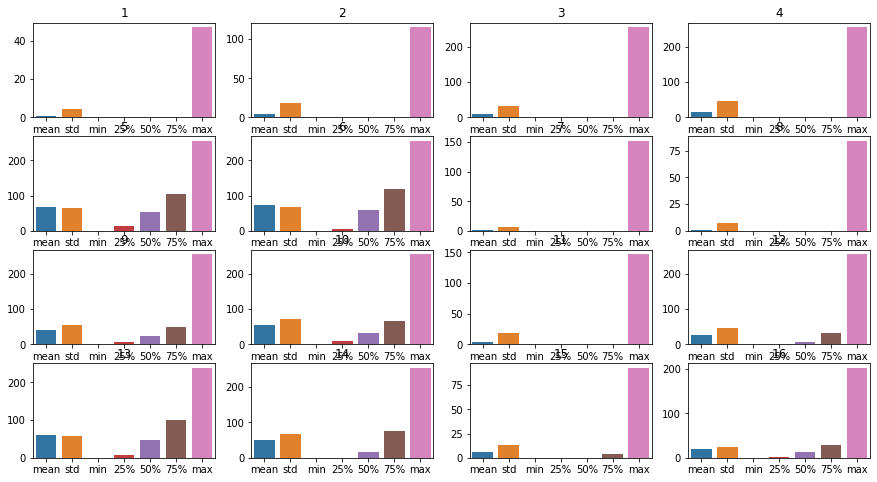

In [16]:
fig, axes = plt.subplots(ncols=4,nrows=4, figsize=(15,8))
a=[]
for i in axes:
    for j in i:
        a.append(j)
for i, ax in zip(sop2.columns, a):
    sns.barplot(x=sop2.describe()[i].keys()[1:], y=sop2.describe()[i].values[1:],ax=ax).set_title(str(i))

Из этих графиков видно как идет распределения в каждой колонке: из среднее, стандартное отклонение и квартили

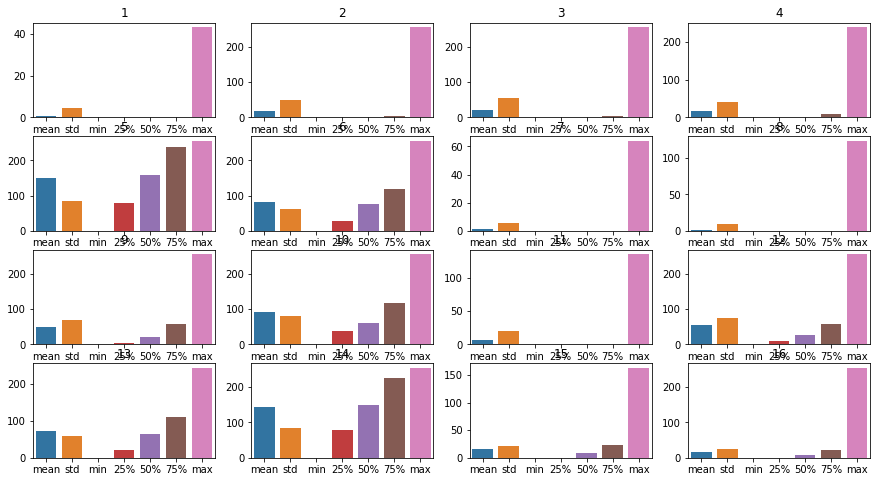

In [17]:
fig, axes = plt.subplots(ncols=4,nrows=4, figsize=(15,8))
a=[]
for i in axes:
    for j in i:
        a.append(j)
for i, ax in zip(sop3.columns, a):
    sns.barplot(x=sop3.describe()[i].keys()[1:], y=sop3.describe()[i].values[1:],ax=ax).set_title(str(i))


Из этих графиков видно как идет распределения в каждой колонке: из среднее, стандартное отклонение и квартили

## ОПРЕДЕЛЕНИЕ МЕТОДОВ КОНТРОЛЯ

Сгладим данные исспользую метод rolling

In [18]:
df_smooth1 = sop1.rolling(window=7).mean()

Построем корреляционную карту

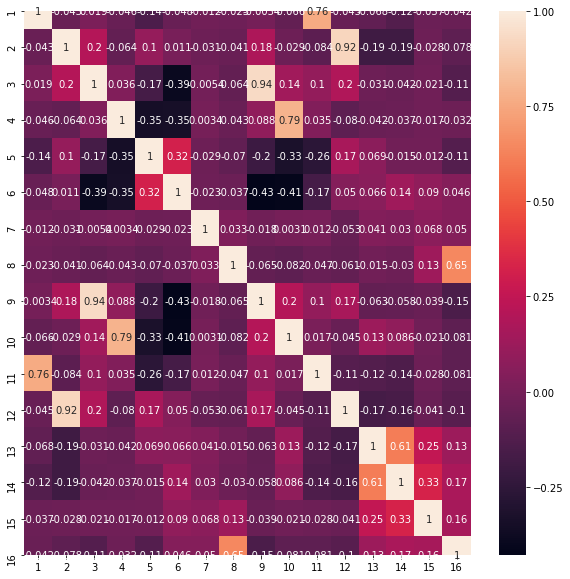

In [19]:
corr = sop1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

В эхо методе если у нас шов без дефектов то значение долно быть равно нулю, в теневом же методе обратно, если шов без дефектов то сигнал проходит без потерь и значение будет равно 255. Эхо-контактный похож на эхо метод но в нем диапазон частот будет больше. <br><br>
Из корреляционной карты(heatmap) видно что у нас неплохо коррелируют следущие значения:
`1~11, 2~12, 3~9, 4~10, 8~16`
<br><br>
Посмотрев на визуализацию значений можем предположить что первые 4 метода это эхо методы т.к. большенство значений приближены к нулю и лишь там где есть выбросы имеются дефект. Пятый и шестой методы обратны и из этого можем сделать вывод что это теневой метод.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C663555AC8>,
      dtype=object)

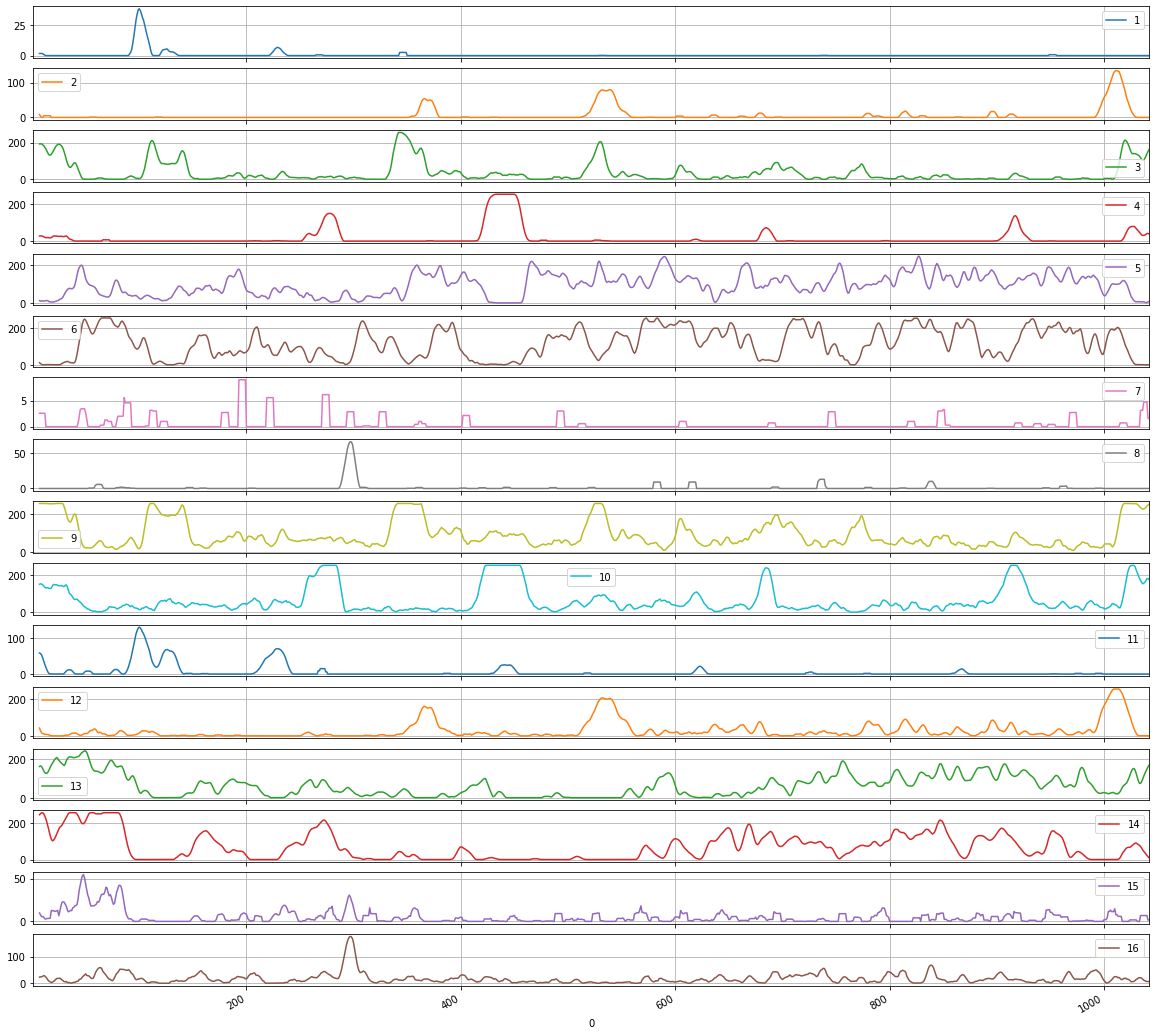

In [20]:
df_smooth1.plot(subplots=True,figsize=(20,20),grid="on")

Рассмотрим коррелирующие графики. Из графиков ниже видно что они ведут себя одинаково только красные(11,12,9,10,16) графики имеют частоты выше чем синие. Из этого можем предположить что красные графики это эко-контактные методы которые дублируют свои эхо методы. Получаем что 9,10,11,12,16 это эхо контактные методы. А 8й это эхо метод

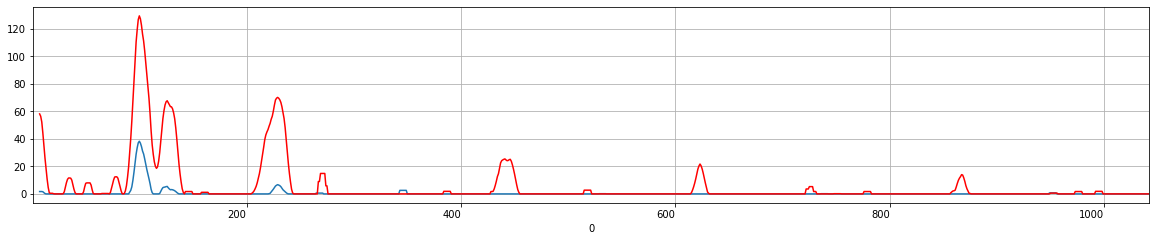

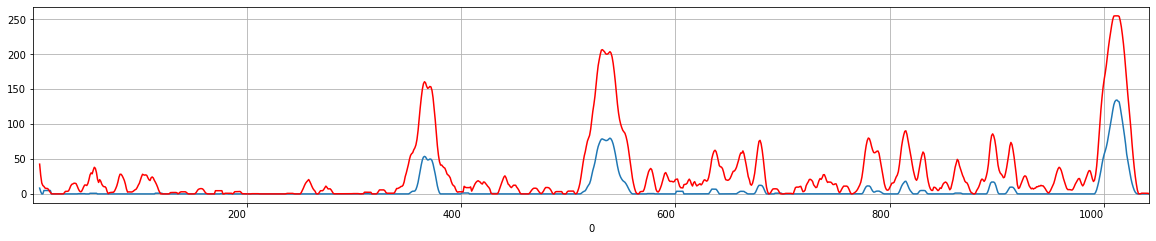

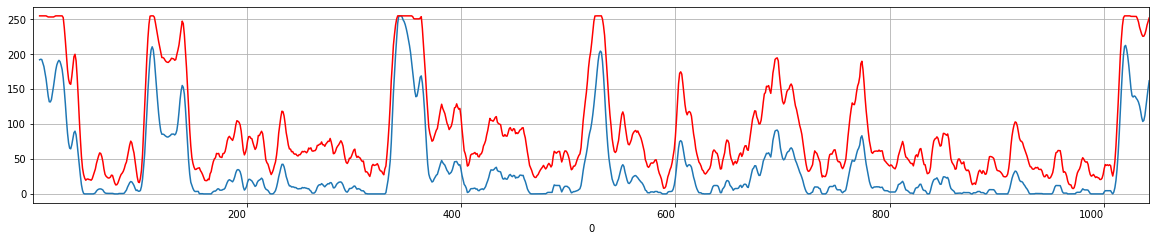

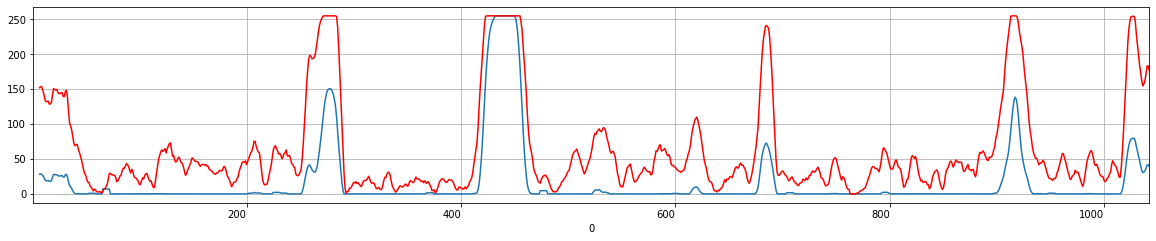

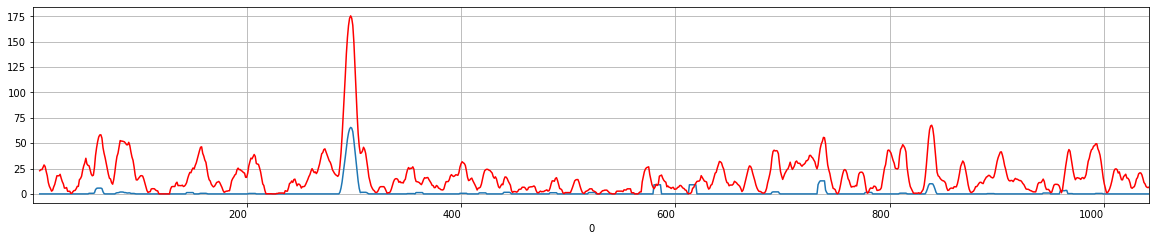

In [21]:
f=[1,2,3,4,8]
s=[11,12,9,10,16]
for i,j in zip(f,s):
    df_smooth1[i].plot(subplots=True,figsize=(20,4),grid="on")
    df_smooth1[j].plot(subplots=True,figsize=(20,4),grid="on", color="r")
    plt.show()
    

Получаем что 

In [22]:
cols = [
    "echo1",
    "echo2",
    "echo3",
    "echo4",
    "shadow5",
    "shadow6",
    "7",
    "echo8",
    "echo-contact9",
    "echo-contact10",
    "echo-contact11",
    "echo-contact12",
    "13",
    "14",
    "15",
    "echo-contact16"]

Рассмотрим 13 и 14 методы. Из графика распределений видно что все таки в 13 и 14 методах преобладабт большие значения, а если посмотреть на визуализацию значений то видно что они обратны, следовательно 13 и 14 методы это теневые методы

In [23]:
# fig, axes = plt.subplots(ncols=4,nrows=4, figsize=(15,8))

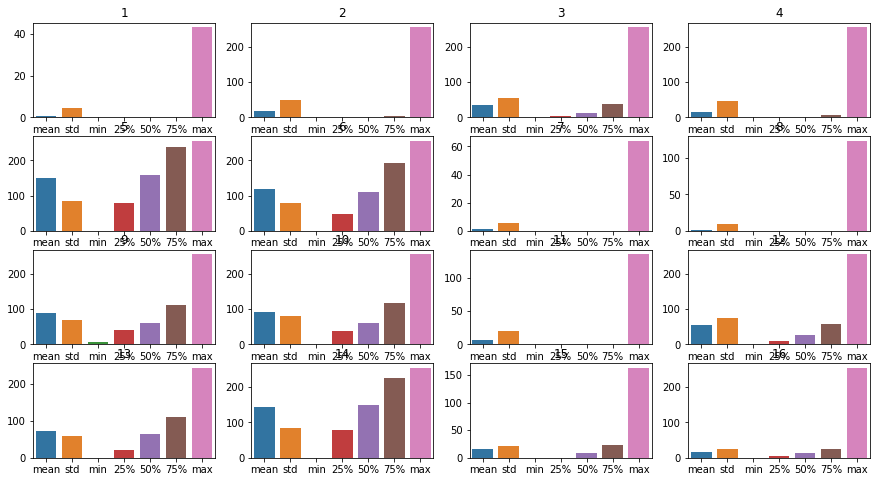

In [24]:
a=[]
for i in axes:
    for j in i:
        a.append(j)
for i, ax in zip(df_smooth1.columns, a):
    sns.barplot(x=df_smooth1.describe()[i].keys()[1:], y=df_smooth1.describe()[i].values[1:],ax=ax).set_title(str(i))
fig

Остались 7 и 15 методы. Визуализации значений и графика распределений выше видно что 7 это эхо метод, а из корреляционной карты что 7 и 15 методы коррелируют, но не так сильно как другие. Из этого можем предположить что 15 метод эхо-контакьный который дублирует 7 эхо метод. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C666580588>],
      dtype=object)

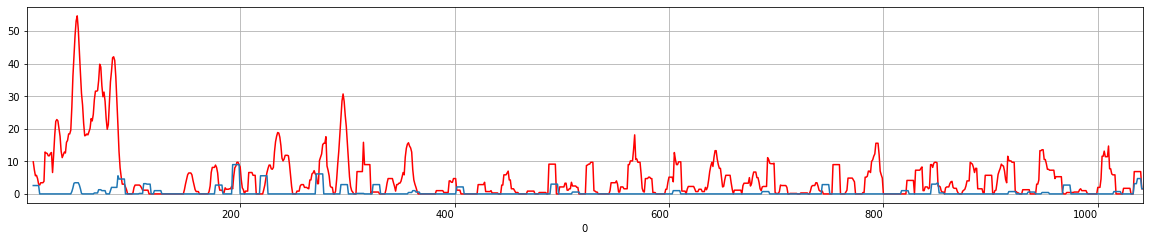

In [25]:
df_smooth1[15].plot(subplots=True,figsize=(20,4),grid="on", color="r")
df_smooth1[7].plot(subplots=True,figsize=(20,4),grid="on")

### Тогда получаем

In [26]:
cols = [
    "echo1",
    "echo2",
    "echo3",
    "echo4",
    "shadow5",
    "shadow6",
    "echo7",
    "echo8",
    "echo-contact9",
    "echo-contact10",
    "echo-contact11",
    "echo-contact12",
    "shadow13",
    "shadow14",
    "echo-contact15",
    "echo-contact16"]

In [27]:
sop1.columns = cols
sop2.columns = cols
sop3.columns = cols

In [28]:
sop1.head(1)

,echo1,echo2,echo3,echo4,shadow5,shadow6,echo7,echo8,echo-contact9,echo-contact10,echo-contact11,echo-contact12,shadow13,shadow14,echo-contact15,echo-contact16
0,,,,,,,,,,,,,,,,
1,0,35,202,27,29,35,0,0,255,147,54,119,125,212,17,39


Обрезаем нахлест на данных и сохраняем файлы

In [29]:
sop1 = sop1[:1020]
sop2 = sop2[:1020]
sop3 = sop3[:1020]

In [30]:
sop1.to_csv("sop1.csv")
sop2.to_csv("sop2.csv")
sop3.to_csv("sop3.csv")